# **<center> VIDEO GAME SALES ANALYSIS AND VISUALIZATION</center>**

![CoolGIF](https://media.giphy.com/media/YwR8wm7KknBok/giphy.gif)


### I have mostly made use of Plotly and Plotly Express in this notebook. Just my personal preference, I find it better because it has added functionality and ofcourse the interactive part. But Seaborn/Matplotlib serves the purpose too. 


In [1]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import plot,iplot,init_notebook_mode
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

%matplotlib inline

In [2]:
#reading the data
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


**Using the .info() , .head() to get a basic idea about the data.**



In [4]:
#dropping null values
df.dropna(how="any",inplace=True)
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

**Since there were missing values that had to be dealt with, I decided to go ahead and drop them to make the data cleaner and easier to use.**

**Creating a heatmap to find correlation between columns** 

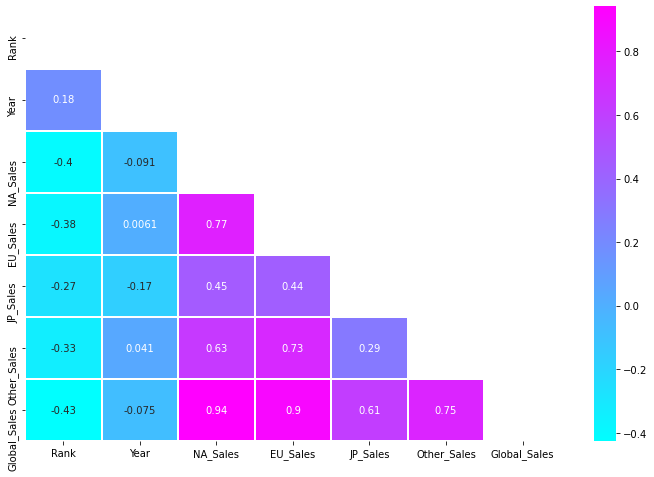

In [5]:
plt.figure(figsize=(12,8))
#creating an array having same shape as df.corr() 
mask = np.zeros_like(df.corr(),dtype= np.bool) 
#setting the upper triangle indices to True
mask[np.triu_indices_from(mask)] = True
#the mask function hides all the indices with value set to True from the heatmap
sns.heatmap(df.corr(),annot=True,linewidth=1,cmap="cool",mask=mask)
#this is a bit excessive and uneccessary but it looks neat this way.

#### North American sales and European sales are the biggest contributors to the global sales.

## ANALYZING TOP-100 GAMES


In [6]:
#creating a dataframe to analyse the top 100 games
gamesales = df.iloc[:100,:]

**Decided to create a 3D ScatterPlot to lump in all the information and get a basic overview**

In [7]:
px.scatter_3d(gamesales,x='Platform',y='Publisher',z='Rank',color='Genre',size ='Global_Sales',
              size_max=60,hover_data=['Name'],height=700)

#### We can see all the games in the top 100 here, with information such as its ranking, the name, publisher, which platform it is available for, the genre it belongs to, and the total global sales of the game. Like i said,all information lumped in.


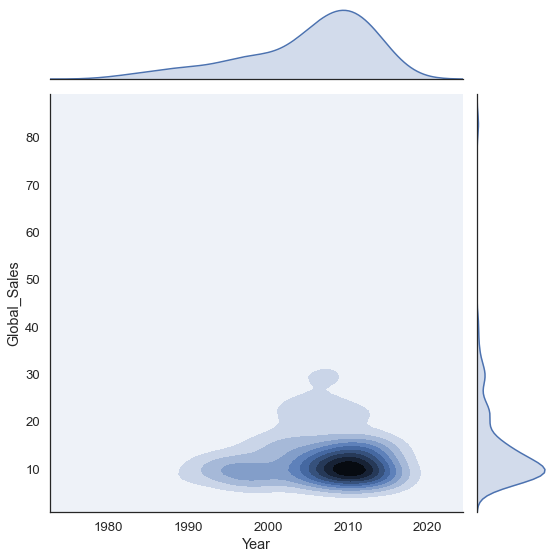

In [8]:

sns.set(style= 'white',font_scale=1.2)
#creating a joint plot to take a closer look at sales over the years
sns.jointplot(kind = 'kde',y=gamesales['Global_Sales'],x=gamesales['Year'],height=8)

#### Video games that made the Top-100 made most sales around the years 2007-2015

## _Taking a closer look at different aspects_

## SALES DISTRIBUTION

In [9]:
#creating a dataframe for year-wise sale analysis
sales =df.groupby('Year')[['Global_Sales','JP_Sales','EU_Sales','Other_Sales','NA_Sales']].sum()
sales.reset_index(inplace=True)

sales.head()

,Year,Global_Sales,JP_Sales,EU_Sales,Other_Sales,NA_Sales
0,1980.0,11.38,0.00,0.67,0.12,10.59
1,1981.0,35.77,0.00,1.96,0.32,33.40
2,1982.0,28.86,0.00,1.65,0.31,26.92
3,1983.0,16.79,8.10,0.80,0.14,7.76
4,1984.0,50.36,14.27,2.10,0.70,33.28


In [10]:
#https://plotly.com/python/creating-and-updating-figures/
#https://plotly.com/python/subplots/

#NA,EU,JP,Others Sale over the years

#initializing figure with subplots
fig = make_subplots(rows =1,cols =5,shared_yaxes=True,column_titles=["Global","NA","EU","JP","Other"])

#adding traces
fig.add_trace(
            go.Bar(
                name='Global',
                opacity=0.5,
                marker=dict(color = 'orange'),  
                orientation='h',
                x =sales['Global_Sales'],
               y =sales['Year']),
    row =1,col =1
)

fig.add_trace(
            go.Scatter(
                name='North America',
                marker=dict(color = 'rgb(25,56,34)'),
                mode ='lines+markers',
                x =sales['NA_Sales'],
                y =sales['Year']),
    row =1,col =2
)
fig.add_trace(
            go.Scatter(
                name='Europe',
                marker=dict(color = 'rgb(75,138,20)'),
                mode ='lines+markers',
                x =sales['EU_Sales'],
                y =sales['Year']),
    row =1,col =3
)
fig.add_trace(
            go.Scatter(
                name='Japan',
                marker=dict(color = 'rgb(157,167,21)'),
                mode ='lines+markers',
                x =sales['JP_Sales'],
                y =sales['Year']),
    row =1,col =4
)
fig.add_trace(
            go.Scatter(
                name='Others',
                marker=dict(color = 'rgb(194,182,59)'),
                mode ='lines+markers',
                x =sales['Other_Sales'],
                y =sales['Year']),
    row =1,col =5
)

#Updating layout
fig.update_layout(title=dict(text="Sales Over the Years",
                             x=0.45,
                             font =dict(family= "Franklin Gothic",size=25)), 
                             )

# Updating xaxis properties
fig.update_xaxes(tickangle=90, row=1, col=1)
fig.update_xaxes(tickangle=90, row=1, col=2)
fig.update_xaxes(tickangle=90, row=1, col=3)
fig.update_xaxes(tickangle=90, row=1, col=4)





#### Here we can see the sales record of video games for each year, global as well as regional records

## GENRE

In [11]:
#Creating a dataframe
genre = df['Genre'].value_counts().to_frame()
genre.reset_index(inplace = True)
genre.rename(columns={'index':"Genre",'Genre':'Count'},inplace = True)
genre.head()

,Genre,Count
0,Action,3251
1,Sports,2304
2,Misc,1686
3,Role-Playing,1470
4,Shooter,1282


**Creating a barplot to analyse the Genres**

In [12]:
px.bar(data_frame= genre,y='Genre',x='Count',color = 'Count',title = {'text':'Genre Count', 'x':0.5,'font':{'family': "Franklin Gothic",'size':25}},color_continuous_scale='Plasma',orientation = 'h',text = 'Count')
#https://plotly.com/python/builtin-colorscales/

#### 1.Action is the most popular Genre.
#### 2.Puzzle is the least popular Genre.



**Creating a piechart to get the percentage distribution**

In [13]:
px.pie(data_frame=df,values = 'Global_Sales', names ='Genre',color_discrete_sequence=px.colors.qualitative.Set2,
       title = {'text':"Distribution & Global Sales of Genre in the Database",'x':0.5,'font':dict(family="Franklin Gothic", size=25)})
#https://plotly.com/python/discrete-color/

#### 1.Action,Sports,Shooter,Role-Playing games contribute to nearly 50% of the global sales.
#### 2.Action games have made nearly 1.7 billion global sales, Sports and Shooter games coming in close second and third.
#### 3.Strategy games have made the least sale, 173 mil. and contribute less 2% to the overall video games sale.

In [14]:
#modifying the dataframe for plotting purpose
genre = df[['Global_Sales','NA_Sales','JP_Sales','EU_Sales','Other_Sales','Genre']].groupby('Genre').sum()
genre.reset_index(inplace = True)
genre.head(12)

,Genre,Global_Sales,NA_Sales,JP_Sales,EU_Sales,Other_Sales
0,Action,1722.84,861.77,158.65,516.48,184.92
1,Adventure,234.59,101.93,51.99,63.74,16.70
2,Fighting,444.05,220.74,87.15,100.00,36.19
3,Misc,789.87,396.92,106.67,211.77,73.92
4,Platform,829.13,445.99,130.65,200.65,51.51
5,Puzzle,242.21,122.01,56.68,50.52,12.47
6,Racing,726.76,356.93,56.61,236.31,76.68
7,Role-Playing,923.83,326.50,350.29,187.57,59.38
8,Shooter,1026.20,575.16,38.18,310.45,101.90
9,Simulation,389.98,181.78,63.54,113.02,31.36


In [15]:
trace1 = go.Bar(x = genre['Genre'],
                y = genre['NA_Sales'],
                name = "NORTH AMERICA",
                marker =dict(color ='rgb(0,60,48)'))
trace2 = go.Bar(x = genre['Genre'],
                y = genre['EU_Sales'],
                name = "EUROPE",
                marker =dict(color ='rgb(1,102,94)'))
trace3 = go.Bar(x = genre['Genre'],
                y = genre['JP_Sales'],
                name = "JAPAN",
                marker =dict(color ='rgb(53,151,143)'))
trace4 = go.Bar(x = genre['Genre'],
                y = genre['Other_Sales'],
                name = "OTHER",
                text=genre['Global_Sales'],
                marker =dict(color ='rgb(128,205,193)'))

data = [trace1,trace2,trace3,trace4]

layout = go.Layout(barmode = 'stack',
                   xaxis = dict(title="GENRE"),
                   yaxis = dict(title="GLOBAL SALES"),
                   title = {'text':"Global Sales of Different Genres & Regional Distribution",'x':0.5,'font':dict(family="Franklin Gothic", size=20)
})
fig = go.Figure(data = data, layout = layout)
iplot(fig)


#### 1. Here we can see how different regions have helped in the sale of all the genres. 
#### 2. Action games seem to be the most popular in every region, except for Japan, where Role-Playing games seem to have had better success.
#### 3. Strategy games have had low success in all regions, with the exception of Japan in this case as well, where Shooting games have done worse.

## PLATFORM

In [16]:

#creating dataframe
platform =df[['Global_Sales','Platform','JP_Sales','NA_Sales','EU_Sales','Other_Sales']].groupby('Platform').sum()
platform['Count'] = df[['Global_Sales','Platform']].groupby('Platform').count()
platform.reset_index(inplace = True)
platform.head()


,Platform,Global_Sales,JP_Sales,NA_Sales,EU_Sales,Other_Sales,Count
0,2600,86.57,0.00,80.78,4.86,0.84,116
1,3DO,0.10,0.10,0.00,0.00,0.00,3
2,3DS,246.27,97.30,78.03,58.29,12.55,499
3,DC,15.97,8.56,5.43,1.69,0.27,52
4,DS,818.91,175.02,388.53,194.05,60.29,2131


**Creating a bubble-chart**

In [17]:
# a bubble-chart
px.scatter(platform, x ='Global_Sales', y = 'Count',size='Global_Sales',color='Platform',
           size_max = 60,title = {'text':"Global Sales of Platforms",'x':0.45,
                                  'font':dict(family="Franklin Gothic", size=25)})

#### 1. Here we see the global sale of games released for different platforms.
#### 2. NintendoDS and PS2 games seem to extremely popular both having a very high count but PS2 games are quite far ahead in terms of global sales, having nearly 1.2 bil. sales.
#### 3. Xbox-360, PS3 and Wii might have had lesser number of games released for their platform compared to DS(lower count comparitively) but has had better global sales.
#### 4. PS, PSP, PC and GameBoyAdvance have had high number of games released for their platforms but haven't done as well in terms of sales.

In [18]:
#creating traces
trace1 = go.Bar(x = platform['Platform'],
                y = platform['NA_Sales'],
                name = "NA",
                marker =dict(color ='rgb(122,1,119)'))
trace2 = go.Bar(x = platform['Platform'],
                y = platform['EU_Sales'],
                name = "EU",
                marker =dict(color ='rgb(221,52,151)'))
trace3 = go.Bar(x = platform['Platform'],
                y = platform['JP_Sales'],
                name = "JP",
                marker =dict(color ='rgb(247,104,161)'))
trace4 = go.Bar(x = platform['Platform'],
                y = platform['Other_Sales'],
                name = "Other",
                marker =dict(color ='rgb(250,159,181)'))

#updating layout
layout = go.Layout(barmode = 'stack',
                   xaxis = dict(title="PLATFORM"),
                   yaxis = dict(title="GLOBAL SALES"),
                   title = {'text':"Platform Sales According to Regions",'x':0.5,'font':dict(family="Franklin Gothic", size=20)
})

#adding traces to the data
data =[trace1,trace2,trace3,trace4]

fig = go.Figure(layout= layout, data = data)

iplot(fig)



#### 1. Games released for DS, PS, PS2, PS3, Wii and Xbox360 have had good sales in North America and Europe.
#### 2. In Japan, the Playstations and NintendoDS games seem to have had better suceess compared to other platform games.
#### 3. PS2 and PS3 games were more popular in rest of the regions.

In [19]:
# creating dataframe for each genre 
action = df[df['Genre']=='Action']
sports = df[df['Genre']=='Sports']
misc = df[df['Genre']=='Misc']
roleplay = df[df['Genre']=='Role-Playing']
shooter = df[df['Genre']=='Shooter']
adventure = df[df['Genre']=='Adventure']
racing = df[df['Genre']=='Racing']
platform = df[df['Genre']=='Platform']
simulation = df[df['Genre']=='Simulation']
fighting = df[df['Genre']=='Fighting']
strategy = df[df['Genre']=='Strategy']
puzzle = df[df['Genre']=='Puzzle']
# this is to be able to plot bar-chart for each genre with different platforms
# and stack them all together

In [20]:
#creating traces
trace1 = go.Bar(x=action.groupby("Platform")['Global_Sales'].sum().index,
                y=action.groupby("Platform")['Global_Sales'].sum().values,
                name ="Action",
                marker = dict(color ='#ef55f1'))
trace2 = go.Bar(x=sports.groupby("Platform")['Global_Sales'].sum().index,
                y=sports.groupby("Platform")['Global_Sales'].sum().values,
                name ="Sports",
                marker = dict(color ='#fb84ce'))
trace3 = go.Bar(x=misc.groupby("Platform")['Global_Sales'].sum().index,
                y=misc.groupby("Platform")['Global_Sales'].sum().values,
                name ="Misc",
                marker = dict(color ='#fbafa1'))
trace4 = go.Bar(x=puzzle.groupby("Platform")['Global_Sales'].sum().index,
                y=puzzle.groupby("Platform")['Global_Sales'].sum().values,
                name ="Puzzle",marker = dict(color ='#f0ed35'))
trace5 = go.Bar(x=roleplay.groupby("Platform")['Global_Sales'].sum().index,
                y=roleplay.groupby("Platform")['Global_Sales'].sum().values,
                name ="Role-Playing",
                marker = dict(color = '#fcd471'))
trace6 = go.Bar(x=shooter.groupby("Platform")['Global_Sales'].sum().index,
                y=shooter.groupby("Platform")['Global_Sales'].sum().values,
                name ="Shooter",
                marker = dict(color ='#c6e516'))
trace7 = go.Bar(x=adventure.groupby("Platform")['Global_Sales'].sum().index,
                y=adventure.groupby("Platform")['Global_Sales'].sum().values,
                name ="Adventure",
                marker = dict(color = '#96d310'))
trace8 = go.Bar(x=racing.groupby("Platform")['Global_Sales'].sum().index,
                y=racing.groupby("Platform")['Global_Sales'].sum().values,
                name ="Racing",
                marker = dict(color ='#61c10b'))
trace9 = go.Bar(x=platform.groupby("Platform")['Global_Sales'].sum().index,
                y=action.groupby("Platform")['Global_Sales'].sum().values,
                name ="Platform",
                marker = dict(color ='#31ac28'))
trace10 = go.Bar(x=simulation.groupby("Platform")['Global_Sales'].sum().index,
                 y=simulation.groupby("Platform")['Global_Sales'].sum().values,
                 name ="Simulation",
                 marker = dict(color ='#439064'))
trace11 = go.Bar(x=fighting.groupby("Platform")['Global_Sales'].sum().index,
                 y=fighting.groupby("Platform")['Global_Sales'].sum().values,
                 name ="Fighting",
                 marker = dict(color = '#3d719a'))
trace12 = go.Bar(x=strategy.groupby("Platform")['Global_Sales'].sum().index,
                 y=strategy.groupby("Platform")['Global_Sales'].sum().values,
                 name ="Strategy",
                 marker = dict(color ='#284ec8'))

data = [trace1, trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9,trace10,trace11,trace12]

#update layout
layout = go.Layout(barmode='stack',#to stack them together
                   title = {'text':"Contribution of Different Genres to Each Platform",'x':0.45,'font':dict(family="Franklin Gothic", size=20)},
                   xaxis=dict(title='PLATFORM'),
                   yaxis=dict( title='GLOBAL SALES'),
                   plot_bgcolor='beige'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)


#### Here we can see which Genre contributed the most/least to the sale of games released for different platforms. Like for example,Sports games have done well for Wii and Shooter games for Xbox360.

## PLATFORM

In [21]:
publisher =df.groupby('Publisher')[['Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
publisher.sort_values(by='Global_Sales',ascending = False, inplace = True)
publisher.reset_index(inplace=True)
publisher = publisher.iloc[:15,:]
publisher.Publisher.values

array(['Nintendo', 'Electronic Arts', 'Activision',
       'Sony Computer Entertainment', 'Ubisoft', 'Take-Two Interactive',
       'THQ', 'Konami Digital Entertainment', 'Sega',
       'Namco Bandai Games', 'Microsoft Game Studios', 'Capcom', 'Atari',
       'Square Enix', 'Warner Bros. Interactive Entertainment'],
      dtype=object)

**Bubble chart to analyse the global sales of the top-10 publishers**

In [22]:
px.scatter(publisher,x ='Global_Sales',y='Publisher',size='Global_Sales',color = 'Publisher',size_max = 60,
          title = {'text':"Global Sales of Top 10 Publishers",'x':0.45,
                                  'font':dict(family="Franklin Gothic", size=25)})

In [23]:
from plotly.subplots import make_subplots

# Initialize figure with subplots
fig = make_subplots(rows=2, cols=2,subplot_titles=("NA", "EU", "JP", "Other")) 

# Add traces
fig.add_trace(
    go.Scatter(x=publisher['Publisher'],
               y=publisher['NA_Sales'],
               name ='NorthAmerica'),
    row =1,col=1
    )
fig.add_trace(
    go.Scatter(x=publisher['Publisher'],
               y=publisher['EU_Sales'],
               name ='Europe'),
    row =1,col=2
    )
fig.add_trace(
    go.Scatter(x=publisher['Publisher'],
               y=publisher['JP_Sales'],
               name='Japan'),
    row =2,col=1
    )
fig.add_trace(
    go.Scatter(x=publisher['Publisher'],
               y=publisher['Other_Sales'],
               name='Other'),
    row =2,col=2
    )


# Update xaxis properties
fig.update_xaxes(showticklabels=False, row=1, col=1)
fig.update_xaxes(showticklabels=False, row=1, col=2)

# Update yaxis properties
fig.update_yaxes(title_text="Sales(in Mil.)", row=1, col=1)
fig.update_yaxes(title_text="Sales(in Mil.)", row=2, col=1)

# Update title and height
fig.update_layout(title=dict(text="Regional Sales Distribution of Publishers",
                             x=0.45,
                             font =dict(family= "Franklin Gothic",size=25)), 
                             height=700)


#### 1. Nintendo, EA,Activision have had the most sales in Europe and North America
#### 2. Nintendo, Namco Bandai, Konami, and Sony have had the most sales in Japan.
#### 3. EA, Nintendo and Sony have had most sales outside of the three previously mentioned regions.

## YEAR

In [24]:
fig1=px.histogram(data_frame=df,x='Year')
fig1.update_layout(title=dict(text="Count of Games Released Each Year",
                             x=0.45,
                             font =dict(family= "Franklin Gothic",size=25)))

In [25]:
fig2 =px.histogram(data_frame=df,x='Year',color ='Genre',opacity=0.75)
fig2.update_layout(barmode='group', bargap=0.5,title=dict(text="Genre Count vs Year",
                             x=0.45,
                             font =dict(family= "Franklin Gothic",size=25)))

### *Zoom in to see the plot more clearly*
#### 1. Here you can see the count of games of different genres for every year in our data.
#### 2. Also, its quite an interesting observation that Action and Sports games have been the most sold genres in majority of the years.

In [26]:
#creating a dataframe with only the top Publishers
pub_year = df.loc[df['Publisher'].isin(['Nintendo', 'Electronic Arts', 'Activision',
       'Sony Computer Entertainment', 'Ubisoft', 'Take-Two Interactive',
       'THQ', 'Konami Digital Entertainment', 'Sega',
       'Namco Bandai Games', 'Microsoft Game Studios', 'Capcom', 'Atari',
       'Square Enix', 'Warner Bros. Interactive Entertainment'])]
#creating a histogram
fig3 = px.histogram(pub_year,x='Year',color='Publisher')
fig3.update_layout(bargap =0.1,barmode='overlay',title=dict(text="Most Popular Publishers vs Years",
                                                x=0.45,
                                                font =dict(family= "Franklin Gothic",size=25)))
#to understand the selection/indexing proces better
#https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/

#### An overlook of the count of games released by different Publishers. Can easily identify which Publisher released most games in a particular year.

In [27]:
fig4 = px.histogram(df,x='Year',color='Platform')
fig4.update_layout(bargap =0.1,barmode='overlay',title=dict(text="Platform vs Years",
                                                x=0.45,
                                                font =dict(family= "Franklin Gothic",size=25)))

#### To identify the count of games released for a particular Platform in a particular year, and which Platform released the most number of games in  a particular year.